# Lifestyle factors in U.S. residential electricity consumption

par Kévin Tang

In [ ]:
pip install factor_analyzer

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from collections import Counter

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from factor_analyzer import FactorAnalyzer

In [ ]:
pd.set_option('display.max_rows', None)

## Extraction des données

### RECS 2005

In [ ]:
#Lecture du fichier de données
data2005 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/RECS05alldata.csv', sep=',')

In [ ]:
data2005

,SURVEY,DOEID,REGIONC,DIVISION,LRGSTATE,TYPEHUQ,MQRESULT,NWEIGHT,HD65,CD65,...,DOLELAPL,DOLNGAPL,DOLNGWTH,DOLNGSPH,DOLFOAPL,DOLFOSPH,DOLFOWTH,DOLLPAPL,DOLLPSPH,DOLLPWTH
0,2005,1,3,7,3,2,9,25677.965247,1231,3281,...,447,125.0,241.0,129.0,99999,99999,99999,99999,99999,99999
1,2005,2,4,9,2,2,1,24261.810262,1663,1123,...,1140,33.0,114.0,56.0,99999,99999,99999,99999,99999,99999
2,2005,3,2,3,0,2,9,31806.295016,5221,1286,...,687,0.0,243.0,578.0,99999,99999,99999,99999,99999,99999
3,2005,4,4,9,0,3,9,22345.397491,5261,667,...,920,99999.0,99999.0,99999.0,99999,99999,99999,99999,99999,99999
4,2005,5,3,6,0,2,9,18842.455420,4392,1238,...,880,0.0,0.0,864.0,99999,99999,99999,99999,99999,99999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,2005,4378,1,2,0,3,9,28765.225408,4910,1337,...,727,35.0,142.0,443.0,99999,99999,99999,99999,99999,99999
4378,2005,4379,3,6,0,2,9,3458.533631,3272,1927,...,643,99999.0,99999.0,99999.0,99999,99999,99999,99999,99999,99999
4379,2005,4380,4,9,0,2,9,5606.182034,7162,60,...,293,99999.0,99999.0,99999.0,0,2077,0,99999,99999,99999
4380,2005,4381,3,7,0,1,9,26024.519207,3474,2110,...,515,99999.0,99999.0,99999.0,99999,99999,99999,99999,99999,99999


In [ ]:
data2005['PERIODEL'].value_counts()

PERIODEL
1    2970
5    1081
2     274
3      44
4      13
Name: count, dtype: int64

In [ ]:
data2005 = data2005[data2005['PERIODEL'] == 1]

In [ ]:
data2005.shape

(2970, 1075)

In [ ]:
data2005 = data2005.dropna()

### RECS 2001

In [ ]:
data2001_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_1.txt', sep=',')

In [ ]:
data2001_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_2.txt', sep=',')

In [ ]:
data2001_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_3.txt', sep=',')

In [ ]:
data2001_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_4.txt', sep=',')

In [ ]:
data2001_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_5.txt', sep=',')

In [ ]:
data2001_6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_6.txt', sep=',')

In [ ]:
data2001_7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_7.txt', sep=',')

In [ ]:
data2001_8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_8.txt', sep=',')

In [ ]:
data2001_9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_9.txt', sep=',')

In [ ]:
data2001_10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_10.txt', sep=',')

In [ ]:
data2001_11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_11.txt', sep=',')

In [ ]:
data2001_12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Lifestyle factors in U.S. residential electricity consumption/datafile2001_12.txt', sep=',')

In [ ]:
# Concatener les fichiers de RECS 2001
data2001 = pd.concat([data2001_1, data2001_2, data2001_3, data2001_4, data2001_5, data2001_6, data2001_7, data2001_8, data2001_9, data2001_10, data2001_11, data2001_12], axis=1)

In [ ]:
# Supprimer les colonnes en doublons
data2001 = data2001.loc[:, ~data2001.columns.duplicated()]

In [ ]:
data2001

,DOEID,NWEIGHT,MQRESULT,REGIONC,DIVISION,LRGSTATE,CDD65,HDD65,TYPEHUQ,NUMFLRS,...,DOLELAPL,DOLNGAPL,DOLFOAPL,DOLLPAPL,DOLKRAPL,DOLELCOL,DOLELRFG,DOLELFZZ,DOLELDWH,DOLELCDR
0,1001,19026,9,1,1,0,769,5549,2,99,...,867,0,0,0,0,241,183,0,68,170
1,1002,28750,9,3,7,0,2374,3348,2,99,...,558,0,0,0,0,345,70,0,45,90
2,1003,14510,8,4,9,0,4912,0,2,99,...,403,0,0,0,0,0,150,0,0,0
3,1004,32819,9,1,1,0,671,5978,2,99,...,3009,191,0,3822,0,698,703,186,164,407
4,1005,10564,9,4,9,0,4912,0,2,99,...,612,0,0,0,0,113,202,0,0,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4817,5848,18308,3,4,8,0,5161,1093,2,99,...,614,0,0,0,0,669,336,76,46,137
4818,5849,33959,1,4,9,2,960,1576,2,99,...,1312,251,0,0,0,134,127,290,45,111
4819,5850,22938,1,3,6,0,1315,3649,2,99,...,1010,0,0,0,0,340,173,166,129,87
4820,5851,23151,3,4,9,0,4912,0,5,3,...,308,0,0,0,0,0,224,0,0,77


In [ ]:
data2001['PERIODEL'].value_counts()

PERIODEL
1    3422
5    1156
2     209
3      30
4       4
        1
Name: count, dtype: int64

In [ ]:
data2001['PERIODEL'].dtype

dtype('O')

In [ ]:
data2001['PERIODEL'].replace(' ', np.nan, inplace=True)

In [ ]:
data2001.dropna(subset=['PERIODEL'], inplace=True)

In [ ]:
data2001['PERIODEL'] = data2001['PERIODEL'].astype(int)

In [ ]:
data2001 = data2001[data2001['PERIODEL'] == 1]

In [ ]:
data2001.shape

(3422, 641)

## Analyse

In [ ]:
data2005_DIVISION_KWH = data2005[['DIVISION', 'KWH']]

In [ ]:
data2005_DIVISION_KWH['MWH'] = data2005_DIVISION_KWH['KWH'] / 1000
data2005_DIVISION_KWH.drop(['KWH'], axis=1, inplace=True)

<ipython-input-81-16ffddc7480c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2005_DIVISION_KWH['MWH'] = data2005_DIVISION_KWH['KWH'] / 1000
<ipython-input-81-16ffddc7480c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2005_DIVISION_KWH.drop(['KWH'], axis=1, inplace=True)


In [ ]:
data2005_DIVISION_KWH

,DIVISION,MWH
0,7,13.459
2,3,19.464
4,6,28.658
5,2,13.212
7,7,19.878
...,...,...
4375,5,9.319
4376,1,2.248
4377,2,8.590
4380,7,16.669


from matplotlib import pyplot as plt
data2005_DIVISION_KWH['DIVISION'].plot(kind='hist', bins=20, title='DIVISION')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data2005_DIVISION_KWH['MWH'].plot(kind='hist', bins=20, title='MWH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data2005_DIVISION_KWH.plot(kind='scatter', x='DIVISION', y='MWH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data2005_DIVISION_KWH['DIVISION'].plot(kind='line', figsize=(8, 4), title='DIVISION')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data2005_DIVISION_KWH['MWH'].plot(kind='line', figsize=(8, 4), title='MWH')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='DIVISION', ylabel='MWH'>

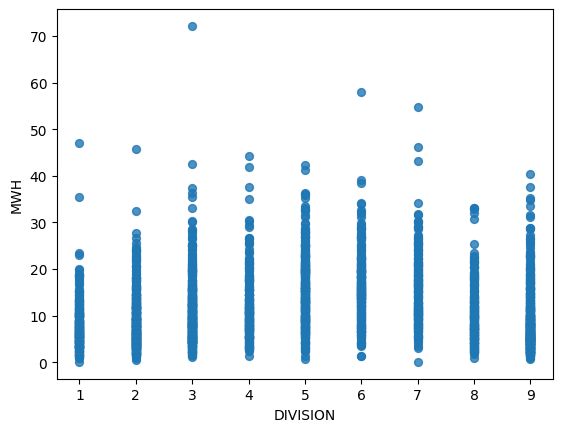

In [ ]:
data2005_DIVISION_KWH.plot(kind='scatter', x='DIVISION', y='MWH', s=32, alpha=.8)

In [ ]:
data2005_MONEYPY_KWH = data2005[['MONEYPY', 'KWH']]

In [ ]:
data2005_MONEYPY_KWH['MWH'] = data2005_MONEYPY_KWH['KWH'] / 1000
data2005_MONEYPY_KWH.drop(['KWH'], axis=1, inplace=True)

<ipython-input-76-674e386e2ece>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2005_MONEYPY_KWH['MWH'] = data2005_MONEYPY_KWH['KWH'] / 1000
<ipython-input-76-674e386e2ece>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2005_MONEYPY_KWH.drop(['KWH'], axis=1, inplace=True)


In [ ]:
data2005_MONEYPY_KWH

,MONEYPY,MWH
0,8,13.459
2,10,19.464
4,23,28.658
5,12,13.212
7,17,19.878
...,...,...
4375,15,9.319
4376,7,2.248
4377,7,8.590
4380,10,16.669


<Axes: xlabel='MONEYPY', ylabel='MWH'>

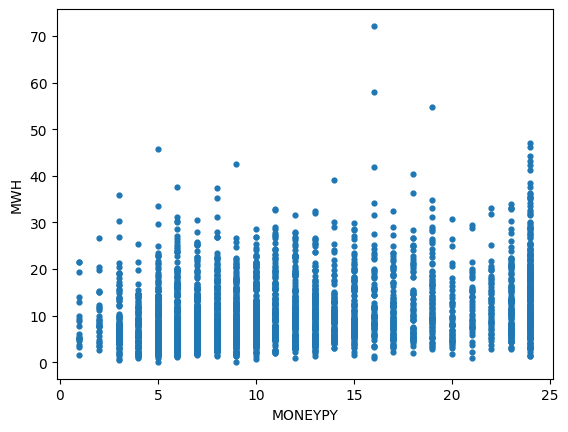

In [ ]:
data2005_MONEYPY_KWH.plot(kind='scatter', x='MONEYPY', y='MWH', s=12)

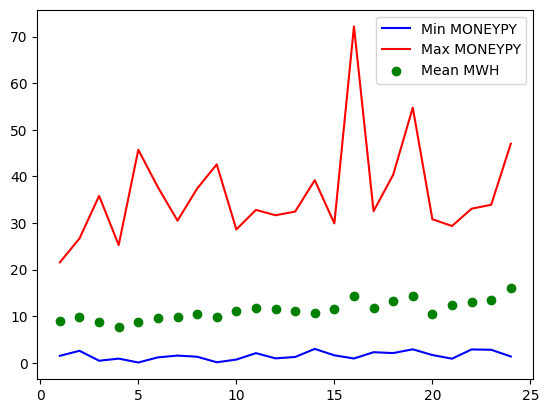

In [ ]:
# Calculer le minimum, le maximum et la moyenne de MONEYPY pour chaque valeur unique de MWH
summary_df = data2005_MONEYPY_KWH.groupby('MONEYPY')['MWH'].agg(['min', 'max', 'mean']).reset_index()

# Tracer une ligne reliant le minimum au maximum de MONEYPY pour chaque valeur de MWH
plt.plot(summary_df['MONEYPY'], summary_df['min'], color='blue', label='Min MONEYPY')
plt.plot(summary_df['MONEYPY'], summary_df['max'], color='red', label='Max MONEYPY')

# Placer un point représentant la moyenne de MONEYPY pour chaque valeur de MWH
plt.scatter(summary_df['MONEYPY'], summary_df['mean'], color='green', label='Mean MWH')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


## Feature selection

Utilisation du logiciel SPSS/PASW-18 pour trouver les features

In [ ]:
features2005_selected = ['CD65', 'HD65', 'YEARMADE', 'OVENUSE', 'DWASHUSE', 'WASHLOAD', 'DRYRUSE', 'NUMCFAN', 'COOLTYPE', 'TOTCSQFT', 'TVCOLOR', 'TVONWD', 'TVONWE', 'NUMPC', 'TIMEON1', 'LGT12', 'LGT4', 'LGT1', 'NHSLDMEM', 'KWH']

In [ ]:
features2001_selected = ['CDD65', 'HDD65', 'YEARMADE', 'OVENUSE', 'DWASHUSE', 'WASHLOAD', 'DRYRUSE', 'NUMCFAN', 'COOLTYPE', 'TOTCSQFT', 'TVCOLOR', 'NUMPC', 'PCUSE', 'LGT12', 'LGT4', 'LGT1', 'NHSLDMEM', 'KWH']

In [ ]:
data2005_selected = data2005[features2005_selected]

In [ ]:
data2001_selected = data2001[features2001_selected]

## Pré-traitement

### RECS 2005

In [ ]:
data2005_selected['TVON'] = data2005_selected['TVONWD'] + data2005_selected['TVONWE']
data2005_selected.drop(['TVONWD', 'TVONWE'], axis=1, inplace=True)

<ipython-input-119-dcfa75456717>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2005_selected['TVON'] = data2005_selected['TVONWD'] + data2005_selected['TVONWE']
<ipython-input-119-dcfa75456717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2005_selected.drop(['TVONWD', 'TVONWE'], axis=1, inplace=True)


In [ ]:
data2005_selected = data2005_selected[data2005_selected['TOTCSQFT'] != 0]

In [ ]:
data2005_selected['ln_TOTCSQFT'] = np.log(data2005_selected['TOTCSQFT'])
data2005_selected.drop(['TOTCSQFT'], axis=1, inplace=True)

In [ ]:
data2005_selected['ln_KWH'] = np.log(data2005_selected['KWH'])
data2005_selected.drop(['KWH'], axis=1, inplace=True)

In [ ]:
data2005_selected = data2005_selected[data2005_selected['NUMPC'] != 99]

In [ ]:
data2005_selected = data2005_selected[data2005_selected['DWASHUSE'] != 99]

In [ ]:
data2005_selected.head(5)

,CD65,HD65,YEARMADE,OVENUSE,DWASHUSE,WASHLOAD,DRYRUSE,NUMCFAN,COOLTYPE,TVCOLOR,NUMPC,TIMEON1,LGT12,LGT4,LGT1,NHSLDMEM,TVON,ln_TOTCSQFT,ln_KWH
0,3281,1231,3,3,30,2,1,6,3,2,1,10,1,0,1,2,4,7.461066,9.507403
4,1238,4392,8,4,30,3,1,6,1,5,2,20,0,0,3,5,8,7.482119,10.263188
5,1236,5162,5,4,30,2,1,3,2,6,2,20,0,0,3,8,6,6.792344,9.488881
8,3278,540,9,3,13,3,1,9,1,5,5,20,0,3,2,4,6,8.442470,9.938758
11,1145,5267,6,2,30,3,1,3,1,4,2,20,0,1,5,5,6,8.411833,9.448254


In [ ]:
data2005_selected.describe()

,CD65,HD65,YEARMADE,OVENUSE,DWASHUSE,WASHLOAD,DRYRUSE,NUMCFAN,COOLTYPE,TVCOLOR,NUMPC,TIMEON1,LGT12,LGT4,LGT1,NHSLDMEM,TVON,ln_TOTCSQFT,ln_KWH
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,1466.751886,4448.016764,6.025985,3.207879,17.513831,2.999162,1.538977,2.734283,1.232188,3.018441,1.652137,25.724225,0.580889,2.093881,2.722548,2.860017,5.180218,7.430340,9.415401
std,846.743306,2017.580686,2.929570,1.202781,6.954793,1.465773,1.720006,2.229825,0.467648,1.394378,0.981642,9.937906,1.374029,2.129114,2.440081,1.382908,1.461547,0.859370,0.602250
min,0.000000,7.000000,1.000000,1.000000,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.812184,3.871201
25%,892.000000,2997.000000,4.000000,2.000000,13.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,20.000000,0.000000,0.000000,1.000000,2.000000,4.000000,6.889591,9.044404
50%,1273.000000,4816.000000,6.000000,3.000000,13.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,20.000000,0.000000,2.000000,2.000000,2.000000,5.000000,7.541683,9.459152
75%,1714.000000,5962.000000,8.000000,4.000000,20.000000,3.000000,1.000000,4.000000,1.000000,4.000000,2.000000,32.000000,1.000000,3.000000,4.000000,4.000000,6.000000,8.030084,9.836386
max,5059.000000,9326.000000,13.000000,9.000000,30.000000,9.000000,9.000000,12.000000,3.000000,11.000000,8.000000,40.000000,15.000000,15.000000,15.000000,10.000000,18.000000,9.118225,11.186849


### RECS 2001

In [ ]:
data2001_selected['KWH'].value_counts()

KWH
7169     4
5255     3
7128     3
7949     3
10561    3
        ..
12146    1
2749     1
4035     1
7888     1
33048    1
Name: count, Length: 3136, dtype: int64

In [ ]:
data2001_selected = data2001_selected[data2001_selected['DWASHUSE'] != 99]

In [ ]:
data2001_selected = data2001_selected[data2001_selected['TOTCSQFT'] != 0]
data2001_selected['ln_TOTCSQFT'] = np.log(data2001_selected['TOTCSQFT'])
data2001_selected.drop(['TOTCSQFT'], axis=1, inplace=True)

<ipython-input-129-591ebc04ae40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2001_selected['ln_TOTCSQFT'] = np.log(data2001_selected['TOTCSQFT'])
<ipython-input-129-591ebc04ae40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2001_selected.drop(['TOTCSQFT'], axis=1, inplace=True)


In [ ]:
data2001_selected = data2001_selected[data2001_selected['PCUSE'] != 99]

In [ ]:
data2001_selected['ln_KWH'] = np.log(data2001_selected['KWH'])
data2001_selected.drop(['KWH'], axis=1, inplace=True)

In [ ]:
data2001_selected

,CDD65,HDD65,YEARMADE,OVENUSE,DWASHUSE,WASHLOAD,DRYRUSE,NUMCFAN,COOLTYPE,TVCOLOR,NUMPC,PCUSE,LGT12,LGT4,LGT1,NHSLDMEM,ln_TOTCSQFT,ln_KWH
3,671,5978,1,3,30,5,1,0,1,2,3,31,0,12,12,5,8.932609,10.872523
16,1025,4095,7,4,30,2,1,1,1,2,2,20,0,3,3,2,7.110696,9.134431
18,1463,3241,10,9,30,5,1,0,1,2,1,10,5,5,5,5,7.731931,10.252629
20,3458,416,7,5,11,9,9,5,1,2,1,20,0,0,0,2,6.841615,7.940940
23,1251,4242,2,5,13,2,1,1,2,3,1,20,0,2,2,2,6.129050,7.943073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,2642,2294,3,4,13,2,1,6,1,1,1,20,0,0,3,2,7.404888,10.134639
4809,2642,2294,5,5,13,3,1,4,1,2,1,10,0,2,3,2,7.907284,10.099013
4811,887,5456,3,2,13,3,1,1,2,4,2,20,1,4,2,4,7.306531,8.707318
4818,960,1576,4,2,13,3,1,6,1,3,1,20,0,2,2,2,7.610853,9.195328


In [ ]:
data2001_selected.describe()

,CDD65,HDD65,YEARMADE,OVENUSE,DWASHUSE,WASHLOAD,DRYRUSE,NUMCFAN,COOLTYPE,TVCOLOR,NUMPC,PCUSE,LGT12,LGT4,LGT1,NHSLDMEM,ln_TOTCSQFT,ln_KWH
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000
mean,1445.735105,4089.827681,5.562786,3.611366,17.868928,3.261228,1.737855,2.627864,1.183318,2.780935,1.421632,24.174152,0.571036,2.346471,3.036664,2.971586,7.550782,9.424469
std,953.539819,1907.075831,2.792593,1.970242,7.038574,1.711952,2.043344,2.106546,0.405621,1.257142,0.807107,8.864676,1.389754,2.216501,2.583031,1.342365,0.659552,0.586725
min,35.000000,0.000000,1.000000,1.000000,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,5.141664,7.013915
25%,777.000000,2514.000000,3.000000,2.000000,13.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,20.000000,0.000000,1.000000,2.000000,2.000000,7.170120,9.013534
50%,1125.000000,4298.000000,5.000000,3.000000,13.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,20.000000,0.000000,2.000000,3.000000,3.000000,7.595890,9.457357
75%,1828.000000,5637.000000,7.000000,4.000000,20.000000,4.000000,1.000000,4.000000,1.000000,3.000000,2.000000,31.000000,1.000000,3.000000,4.000000,4.000000,8.003028,9.853062
max,5161.000000,8122.000000,13.000000,9.000000,30.000000,9.000000,9.000000,10.000000,3.000000,13.000000,9.000000,40.000000,12.000000,20.000000,40.000000,9.000000,9.584384,11.096531


### Fusion des 2 RECS

In [ ]:
data2005_selected.rename(columns={'CD65': 'CDD65', 'HD65': 'HDD65', 'TIMEON1': 'PCUSE'}, inplace=True)

In [ ]:
data_all = pd.concat([data2005_selected, data2001_selected], axis=0)

In [ ]:
data_all

,CDD65,HDD65,YEARMADE,OVENUSE,DWASHUSE,WASHLOAD,DRYRUSE,NUMCFAN,COOLTYPE,TVCOLOR,NUMPC,PCUSE,LGT12,LGT4,LGT1,NHSLDMEM,TVON,ln_TOTCSQFT,ln_KWH
0,3281,1231,3,3,30,2,1,6,3,2,1,10,1,0,1,2,4.0,7.461066,9.507403
4,1238,4392,8,4,30,3,1,6,1,5,2,20,0,0,3,5,8.0,7.482119,10.263188
5,1236,5162,5,4,30,2,1,3,2,6,2,20,0,0,3,8,6.0,6.792344,9.488881
8,3278,540,9,3,13,3,1,9,1,5,5,20,0,3,2,4,6.0,8.442470,9.938758
11,1145,5267,6,2,30,3,1,3,1,4,2,20,0,1,5,5,6.0,8.411833,9.448254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,2642,2294,3,4,13,2,1,6,1,1,1,20,0,0,3,2,NaN,7.404888,10.134639
4809,2642,2294,5,5,13,3,1,4,1,2,1,10,0,2,3,2,NaN,7.907284,10.099013
4811,887,5456,3,2,13,3,1,1,2,4,2,20,1,4,2,4,NaN,7.306531,8.707318
4818,960,1576,4,2,13,3,1,6,1,3,1,20,0,2,2,2,NaN,7.610853,9.195328


In [ ]:
data_all = data_all.dropna()

In [ ]:
data_all.describe()

,CDD65,HDD65,YEARMADE,OVENUSE,DWASHUSE,WASHLOAD,DRYRUSE,NUMCFAN,COOLTYPE,TVCOLOR,NUMPC,PCUSE,LGT12,LGT4,LGT1,NHSLDMEM,TVON,ln_TOTCSQFT,ln_KWH
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,1466.751886,4448.016764,6.025985,3.207879,17.513831,2.999162,1.538977,2.734283,1.232188,3.018441,1.652137,25.724225,0.580889,2.093881,2.722548,2.860017,5.180218,7.430340,9.415401
std,846.743306,2017.580686,2.929570,1.202781,6.954793,1.465773,1.720006,2.229825,0.467648,1.394378,0.981642,9.937906,1.374029,2.129114,2.440081,1.382908,1.461547,0.859370,0.602250
min,0.000000,7.000000,1.000000,1.000000,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.812184,3.871201
25%,892.000000,2997.000000,4.000000,2.000000,13.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,20.000000,0.000000,0.000000,1.000000,2.000000,4.000000,6.889591,9.044404
50%,1273.000000,4816.000000,6.000000,3.000000,13.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,20.000000,0.000000,2.000000,2.000000,2.000000,5.000000,7.541683,9.459152
75%,1714.000000,5962.000000,8.000000,4.000000,20.000000,3.000000,1.000000,4.000000,1.000000,4.000000,2.000000,32.000000,1.000000,3.000000,4.000000,4.000000,6.000000,8.030084,9.836386
max,5059.000000,9326.000000,13.000000,9.000000,30.000000,9.000000,9.000000,12.000000,3.000000,11.000000,8.000000,40.000000,15.000000,15.000000,15.000000,10.000000,18.000000,9.118225,11.186849


## Analyse factorielle

Utilisation du logiciel SPSS/PASW-18 pour trouver les facteurs

In [ ]:
fa = FactorAnalyzer()
fa.fit(data_all)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
import statsmodels.api as sm
X = data_all.drop(['ln_KWH'], axis=1)
y = data_all['ln_KWH']
model = sm.OLS(y, X).fit()


In [ ]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 ln_KWH   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          1.190e+04
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        15:24:10   Log-Likelihood:                         -1262.1
No. Observations:                1193   AIC:                                      2560.
Df Residuals:                    1175   BIC:                                      2652.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
correlation = data_all.corr()

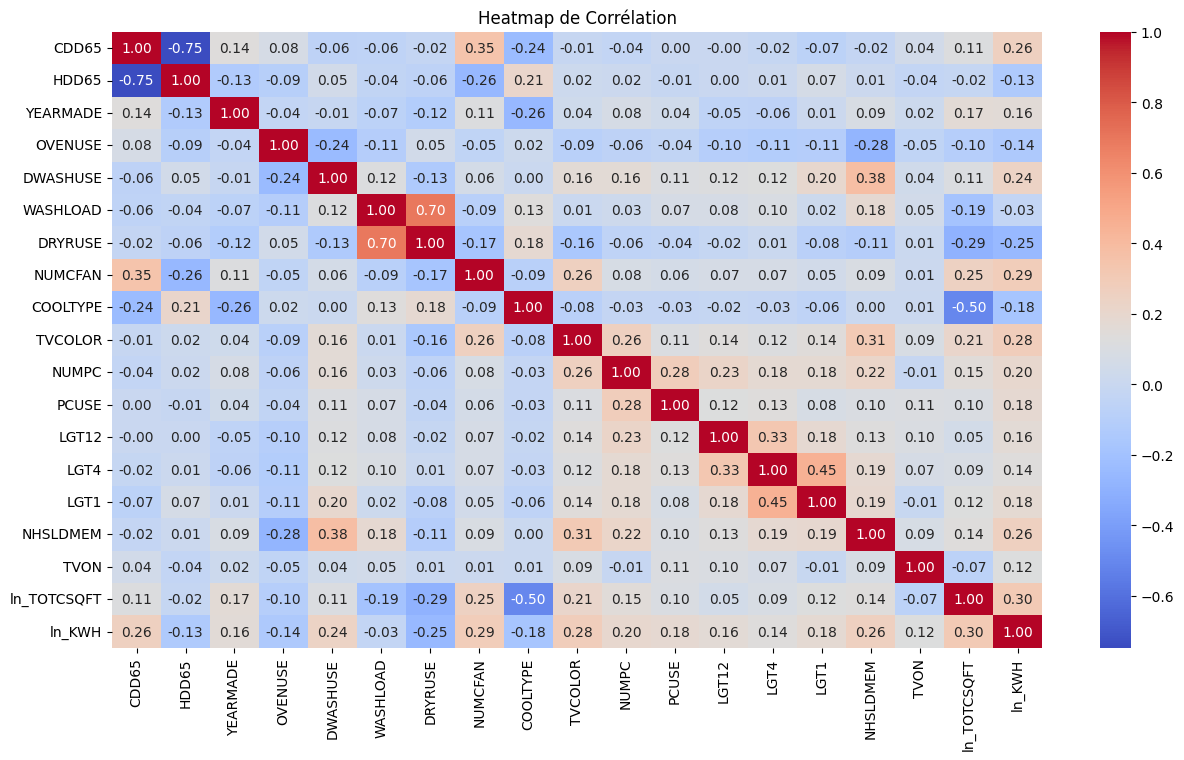

In [ ]:
plt.figure(figsize=(15, 8))
seaborn.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Corrélation')
plt.show()

In [ ]:
# Calculer la variance de chaque feature
variances = data_all.var()

# Trier les features par variance de la plus élevée à la plus faible
variances_sorted = variances.sort_values(ascending=False)

# Afficher les features avec les variances les plus élevées
print(variances_sorted.head(10))  # Afficher les 10 premières features

HDD65       4.070632e+06
CDD65       7.169742e+05
PCUSE       9.876197e+01
DWASHUSE    4.836915e+01
YEARMADE    8.582378e+00
LGT1        5.953996e+00
NUMCFAN     4.972121e+00
LGT4        4.533125e+00
DRYRUSE     2.958421e+00
WASHLOAD    2.148489e+00
dtype: float64


## Regression multiple

Les algorithmes utilisés ne sont pas indiqués

## Evaluation

Calcul de R²